# Analysis of global Sherwood numbers

The global Sherwood number is analyzed for the following scenarios:

- time dependent behavior for spherical cap, dimpled ellipsoidal, and skirted bubbles with and without reaction
- comparison between slip and Dirichlet boundary condition

## Temporal behavior

In [1]:
import helper_module as hm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

data_path = "../data/single_phase/"
output_path = "../output/"

def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

In [2]:
cases = ["wa18_l16", "scap_l16", "dell_l17"]
bcs = ["1", "slip_1"]
columns = ["t", "snGradT", "A"]

file_names = [data_path + "{}/scalar_transport_{}/snGradTGlobal.csv".format(case, bc) for case in cases for bc in bcs]


all_data = {}
for name in file_names:
    key_1 = name.split("/")[3]
    if len(name.split("/")[4].split("_")) is 3:
        key_2 = "dirichlet"
    else:
        key_2 = "slip"
    all_data[key_1 + "_" + key_2] = pd.read_csv(name, header=0, names=columns)
    
all_data["wa18_l16_dirichlet"].head()

,t,snGradT,A
0,0,2970.221623,0.028413
1,1,238.126841,0.028413
2,2,237.347170,0.028413
3,3,237.279214,0.028413
4,4,237.272974,0.028413


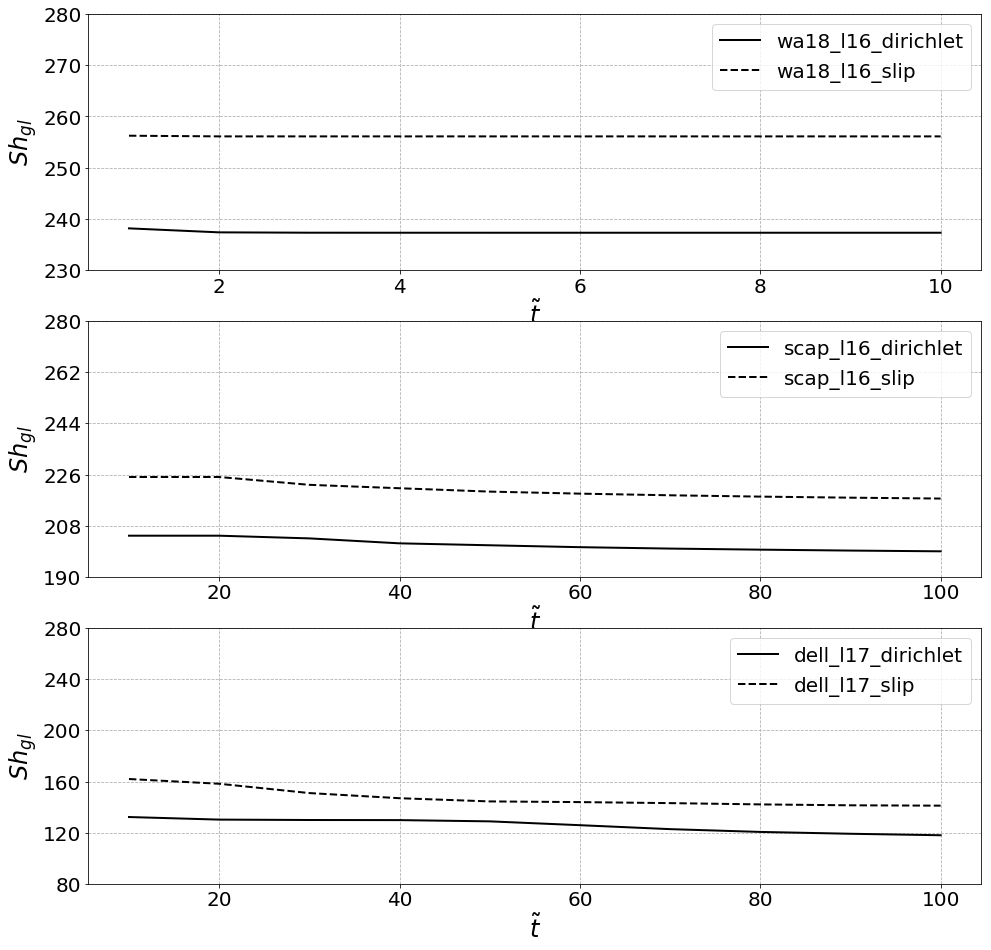

In [3]:
rc('text', usetex=False)
fig, axarr = plt.subplots(3, 1, figsize=(hm.figure_width, 16))

ls = ["-", "--"]
y_min = [230, 190, 80]

for i, case in enumerate(cases):
    keys = [case + "_" + bc for bc in ["dirichlet", "slip"]]
    for j, key in enumerate(keys):
        data = all_data[key]
        axarr[i].plot(data.t[1:], data.snGradT[1:], label=key, ls=ls[j], lw=2, color="k")
    axarr[i].set_ylabel(r"$Sh_{gl}$", fontsize=hm.fontsize_label)
    #axarr[i].set_yscale("log")
    axarr[i].tick_params(which='major', labelsize=hm.fontsize_tick)
    axarr[i].minorticks_off()
    axarr[i].set_ylim(y_min[i], 280)
    ticks = np.round(np.linspace(y_min[i], 280, 6), 0)
    axarr[i].set_yticks(ticks)
    axarr[i].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    axarr[i].grid(True, ls="--")
    axarr[i].set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
    axarr[i].legend(fontsize=hm.fontsize_legend)

## Comparison between slip and Dirichlet

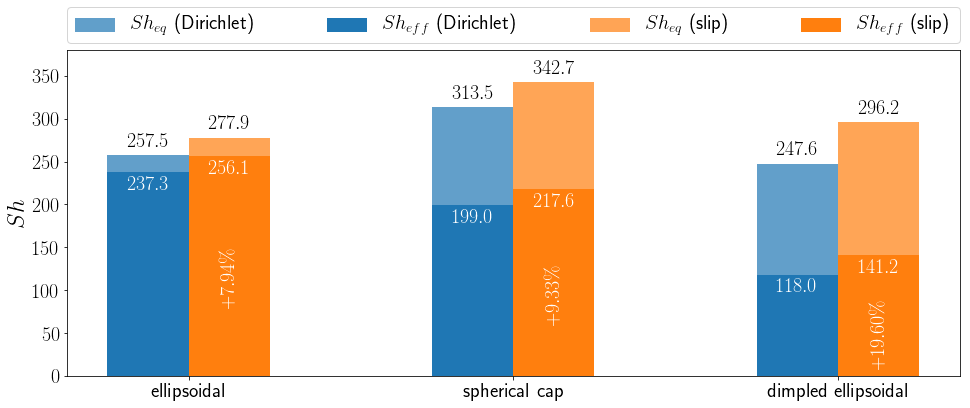

In [4]:
rc('text', usetex=True)
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

sh_dir = []
sh_slip = []
area_ratio = []
for key in all_data.keys():
    data = all_data[key]
    if key.split("_")[-1] == "dirichlet":
        sh_dir.append(data.snGradT.values[-1])
        # area of 3° wedge slice x 120 over the surface area of an equivalent sphere
        # equivalent diamter is always d_b=1
        area_ratio.append(data.A.values[-1] * 120 / np.pi)
    else:
        sh_slip.append(data.snGradT.values[-1])

# bar plot of global Sh
x = np.linspace(1, 5, 3)
ax.bar(x, np.asarray(sh_dir) * np.asarray(area_ratio), width=0.5, color="C0", alpha=0.7, label=r"$Sh_{eq}$ (Dirichlet)")
ax.bar(x, sh_dir, width=0.5, color="C0", label=r"$Sh_{eff}$ (Dirichlet)")
ax.bar(x+0.5, np.asarray(sh_slip) * np.asarray(area_ratio), width=0.5, color="C1", alpha=0.7, label=r"$Sh_{eq}$ (slip)")
ax.bar(x+0.5, sh_slip, width=0.5, color="C1", label=r"$Sh_{eff}$ (slip)")

# difference Dirichlet / slip
diff_sh = [(sh_s - sh_d) / sh_d * 100 for sh_s, sh_d in zip(sh_slip, sh_dir)]
for i, (x_i, diff_i) in enumerate(zip(x, diff_sh)):
    ax.text(x_i+0.5, sh_slip[i]/1.9, r"${:+1.2f}\%$".format(np.around(diff_i, 2)), color="w", fontsize=hm.fontsize_legend,
           rotation=90, ha="center")

# global Sherwood number text labels
offn = 20
offp = 10
for i, sh in enumerate(sh_dir):
    ax.text(x[i], sh-offn, r"${:1.1f}$".format(np.round(sh, 1)),
            ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i], sh * area_ratio[i] + offp, r"${:1.1f}$".format(np.round(sh * area_ratio[i], 1)),
            ha="center", fontsize=hm.fontsize_legend)
for i, sh in enumerate(sh_slip):
    ax.text(x[i]+0.5, sh-offn, r"${:1.1f}$".format(np.round(sh, 1)),
            ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i]+0.5, sh * area_ratio[i] + offp, r"${:1.1f}$".format(np.round(sh * area_ratio[i], 1)), ha="center", fontsize=hm.fontsize_legend)

ax.tick_params(which='major', labelsize=hm.fontsize_tick)
ax.set_ylabel(r"$Sh$", fontsize=hm.fontsize_label)
ax.set_ylim(0.0, 380)
ax.set_xticks(x+0.25)
ax.set_xticklabels(["ellipsoidal", "spherical cap", "dimpled ellipsoidal"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("global_sh_dirichlet_vs_slip")